In [7]:
# Trabajo Práctico 1 - Métodos Computacionales
# Regresión Lineal Múltiple

# Autores: Federico Villanueva y [Nombre del compañero]
# Fecha: 14/05/2025

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.linalg import inv

# Función general para resolver la regresión lineal y calcular beta

def calcular_beta(X, y):
    return inv(X.T @ X) @ X.T @ y

def calcular_ecm(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)


## Primera parte

### 1.a) ¿Col(X) es un subespacio vectorial de $\mathbb{R}^n$?

Sabemos que:

$$
\text{Col}(X) = \{ b \in \mathbb{R}^n \mid b = X \beta \text{ con } \beta \in \mathbb{R}^p \}
$$

**Contiene al vector cero:**  
Tomamos $\beta = 0 \Rightarrow X \beta = 0 \in \mathbb{R}^n \Rightarrow 0 \in \text{Col}(X)$

**Cerrado bajo suma:**  
Sean $b_1 = X \beta_1$ y $b_2 = X \beta_2$, entonces:

$$
b_1 + b_2 = X \beta_1 + X \beta_2 = X(\beta_1 + \beta_2) \in \text{Col}(X)
$$

**Cerrado bajo multiplicación escalar:**  
Sea $c \in \mathbb{R}$, $b = X \beta$, entonces:

$$
cb = X(c\beta) \in \text{Col}(X)
$$

Por lo tanto, $\text{Col}(X)$ es subespacio de $\mathbb{R}^n$.

---

### 1.b) Demostrar que $u \cdot v = v^T u$

Sean $u, v \in \mathbb{R}^{n \times 1}$.

Sabemos que:

$$
u \cdot v = \sum_{i=1}^n u_i v_i \quad \text{y} \quad v^T u = \sum_{i=1}^n v_i u_i
$$

Como en $\mathbb{R}$ la multiplicación es conmutativa, se cumple que:

$$
u \cdot v = v^T u
$$

---

### 1.c) Definición de solución óptima

Buscamos $\beta^*$ que minimice:

$$
\| y - X \beta^* \| = \min_{\beta \in \mathbb{R}^p} \| y - X \beta \|
$$

Según el teorema de la proyección ortogonal:

Sea $S = \text{Col}(X)$, y $X \beta^* \in S$. Entonces:

$$
(y - X \beta^*) \cdot s = 0 \quad \text{para todo } s \in S
$$

Como $s = X \beta$, se deduce:

$$
(y - X \beta^*) \cdot (X \beta) = 0
$$

---

### 1.d) Demostrar que $X^T (y - X \beta^*) = 0$

Partimos de:

$$
(y - X \beta^*) \cdot (X \beta) = 0
$$

Entonces:

$$
(X \beta)^T (y - X \beta^*) = \beta^T X^T (y - X \beta^*)
$$

Para que esto sea 0 para todo $\beta$, se debe cumplir:

$$
X^T (y - X \beta^*) = 0
$$

---

### 1.e) Ecuaciones normales

A partir de la igualdad anterior:

$$
X^T y - X^T X \beta^* = 0 \Rightarrow X^T X \beta^* = X^T y
$$

---

### 1.f) Solución explícita

Si $X^T X$ es invertible (las columnas de $X$ son l.i.), entonces:

$$
\beta^* = (X^T X)^{-1} X^T y
$$

Este es el estimador de mínimos cuadrados ordinarios.

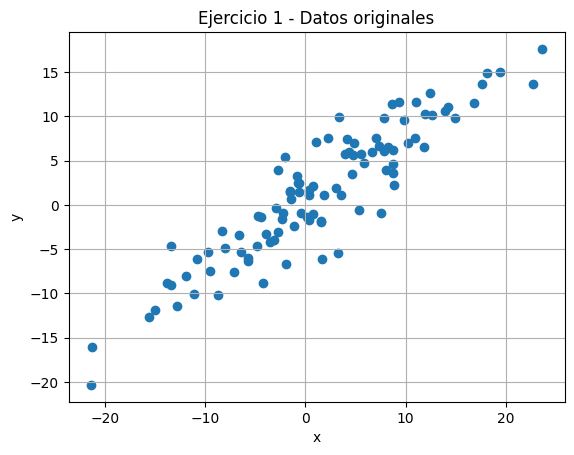

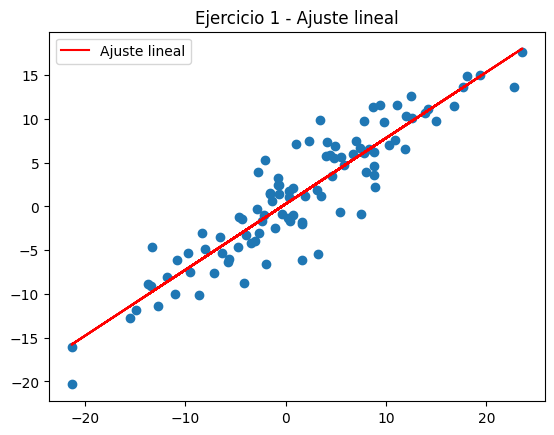

Coeficientes beta: [0.75296295 0.28565184]
ECM: 8.659795811782022


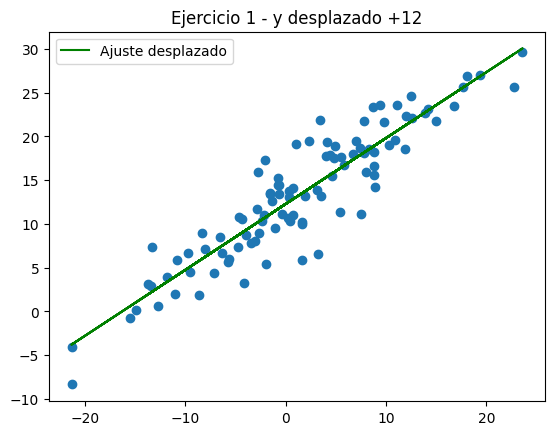

Beta desplazado: [ 0.75296295 12.28565184]
ECM desplazado: 8.659795811782022


In [8]:
# --------------------------
# PARTE 2 - Datos sintéticos
# --------------------------

## EJERCICIO 1 ##

# a) Gráfico de puntos
df1 = pd.read_csv('ejercicio_1.csv')
X_raw = df1.iloc[:, 0].values
y = df1.iloc[:, 1].values

plt.scatter(X_raw, y)
plt.title("Ejercicio 1 - Datos originales")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# b) Ajuste lineal (X con columna de unos)
X = np.vstack([X_raw, np.ones(len(X_raw))]).T
beta = calcular_beta(X, y)
y_pred = X @ beta

plt.scatter(X_raw, y)
plt.plot(X_raw, y_pred, color='red', label='Ajuste lineal')
plt.title("Ejercicio 1 - Ajuste lineal")
plt.legend()
plt.show()

print("Coeficientes beta:", beta)
print("ECM:", calcular_ecm(y, y_pred))

# c) y desplazado 12 unidades
y_desplazado = y + 12
beta_desplazado = calcular_beta(X, y_desplazado)
y_pred_desplazado = X @ beta_desplazado

plt.scatter(X_raw, y_desplazado)
plt.plot(X_raw, y_pred_desplazado, color='green', label='Ajuste desplazado')
plt.title("Ejercicio 1 - y desplazado +12")
plt.legend()
plt.show()

print("Beta desplazado:", beta_desplazado)
print("ECM desplazado:", calcular_ecm(y_desplazado, y_pred_desplazado))

# d) Comentario: Para representar cualquier recta, usamos una columna de unos para intercepto.

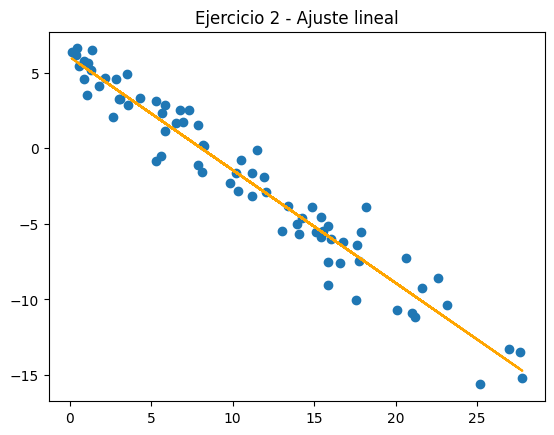

ECM ejercicio 2: 1.7851457268272324


In [9]:
## EJERCICIO 2 ##
df2 = pd.read_csv('ejercicio_2.csv')
X2_raw = df2.iloc[:, 0].values
y2 = df2.iloc[:, 1].values
X2 = np.vstack([X2_raw, np.ones(len(X2_raw))]).T
beta2 = calcular_beta(X2, y2)
y2_pred = X2 @ beta2

plt.scatter(X2_raw, y2)
plt.plot(X2_raw, y2_pred, color='orange')
plt.title("Ejercicio 2 - Ajuste lineal")
plt.show()

print("ECM ejercicio 2:", calcular_ecm(y2, y2_pred))

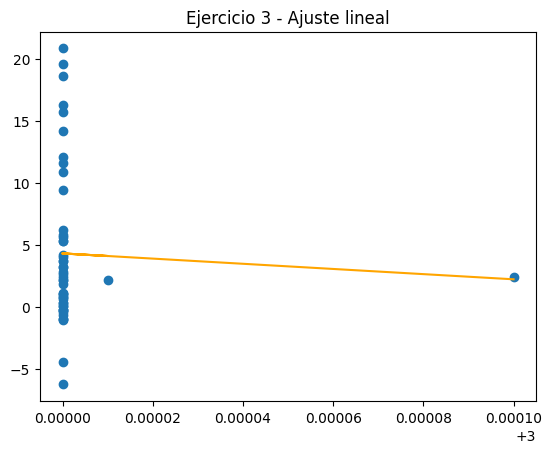

In [10]:
## EJERCICIO 3 ##
df3 = pd.read_csv('ejercicio_3.csv')
X3_raw = df3.iloc[:, 0].values
y3 = df3.iloc[:, 1].values
X3 = np.vstack([X3_raw, np.ones(len(X3_raw))]).T
beta3 = calcular_beta(X3, y3)
y3_pred = X3 @ beta3

plt.scatter(X3_raw, y3)
plt.plot(X3_raw, y3_pred, color='orange')
plt.title("Ejercicio 3 - Ajuste lineal")
plt.show()

### Comentario sobre el resultado

Observamos que la diferencia entre los valores de la variable `x` es muy pequeña (los puntos están muy juntos en el eje horizontal), mientras que los valores de `y` varían mucho más. 

Esto provoca que la pendiente ajustada sea muy baja y la ordenada al origen elevada, reflejando que `x` aporta muy poca información para explicar `y`. Como resultado, el modelo ajusta una recta casi horizontal.

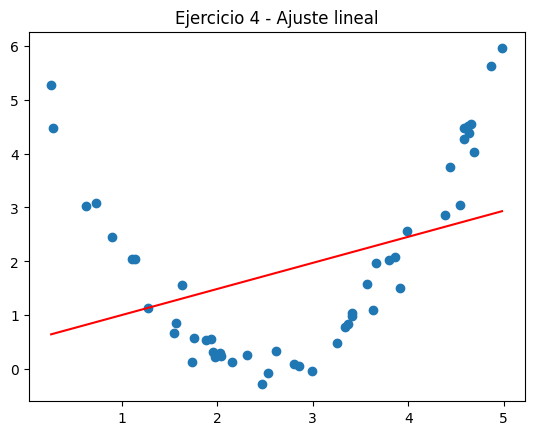

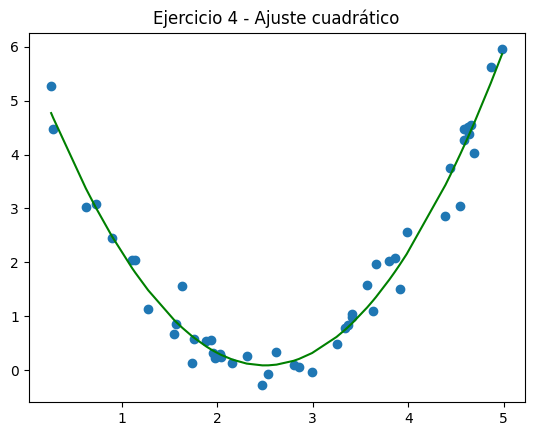

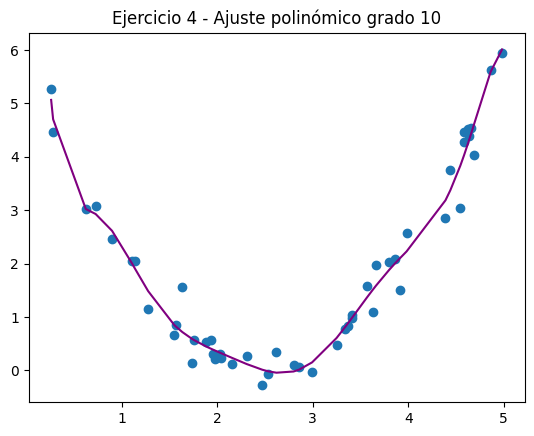

ECM polinómico grado 10: 0.08092990776523358


In [11]:


## EJERCICIO 4 ##
df4 = pd.read_csv('ejercicio_4.csv')
X4_raw = df4.iloc[:, 0].values
y4 = df4.iloc[:, 1].values

# a) Ajuste lineal
X4 = np.vstack([X4_raw, np.ones(len(X4_raw))]).T
beta4 = calcular_beta(X4, y4)
y4_pred = X4 @ beta4

plt.scatter(X4_raw, y4)
plt.plot(X4_raw, y4_pred, color='red')
plt.title("Ejercicio 4 - Ajuste lineal")
plt.show()

# b) Modelo cuadrático
X4_cuad = np.vstack([X4_raw**2, X4_raw, np.ones(len(X4_raw))]).T
beta4_cuad = calcular_beta(X4_cuad, y4)
y4_cuad_pred = X4_cuad @ beta4_cuad

plt.scatter(X4_raw, y4)
plt.plot(X4_raw, y4_cuad_pred, color='green')
plt.title("Ejercicio 4 - Ajuste cuadrático")
plt.show()

# d) Ajuste polinómico grado 10
X4_poly = np.vstack([X4_raw**i for i in range(10, -1, -1)]).T
beta4_poly = calcular_beta(X4_poly, y4)
y4_poly_pred = X4_poly @ beta4_poly

plt.scatter(X4_raw, y4)
plt.plot(X4_raw, y4_poly_pred, color='purple')
plt.title("Ejercicio 4 - Ajuste polinómico grado 10")
plt.show()

print("ECM polinómico grado 10:", calcular_ecm(y4, y4_poly_pred))


ECM entrenamiento: 3.600903687038882
ECM test: 4.436433561918388
ECM test usando ajuste total: 4.333107809212963


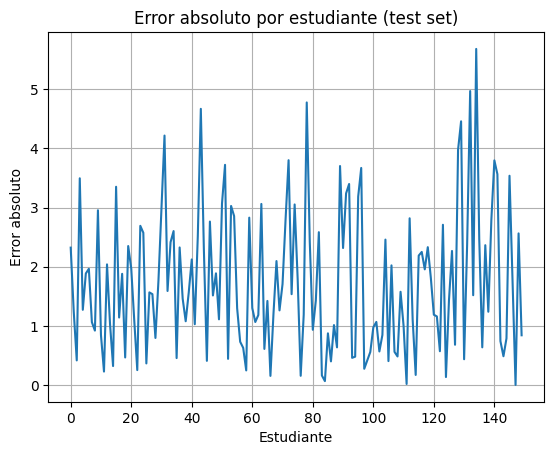

In [12]:
# -------------------------------
# PARTE 3 - Datos reales (student)
# -------------------------------

student = pd.read_csv('student_performance.csv')
train = student.iloc[:450, :]
test = student.iloc[450:, :]

X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_train_ext = np.hstack([X_train, np.ones((X_train.shape[0], 1))])

X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values
X_test_ext = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# Ajuste con datos de entrenamiento
beta_student = calcular_beta(X_train_ext, y_train)
y_pred_train = X_train_ext @ beta_student
y_pred_test = X_test_ext @ beta_student

print("ECM entrenamiento:", calcular_ecm(y_train, y_pred_train))
print("ECM test:", calcular_ecm(y_test, y_pred_test))

# Ajuste con todos los datos
X_all = np.hstack([student.iloc[:, :-1].values, np.ones((student.shape[0], 1))])
y_all = student.iloc[:, -1].values
beta_all = calcular_beta(X_all, y_all)
y_pred_all_test = X_test_ext @ beta_all

print("ECM test usando ajuste total:", calcular_ecm(y_test, y_pred_all_test))

# Gráfico de errores por estudiante
errores = np.abs(y_test - y_pred_test)
plt.plot(errores)
plt.title("Error absoluto por estudiante (test set)")
plt.xlabel("Estudiante")
plt.ylabel("Error absoluto")
plt.grid(True)
plt.show()